In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# simulate ancey or fan model trajectory with the same code

def ancey(dt,tmax,seed=1):
    np.random.seed(seed)
    N = int(tmax//dt)+1
    D = 1
    U0 = 0.1
    R = np.random.normal(size=N)*np.sqrt(2*D*dt)
    U = np.empty(shape=N)
    u = 0.0
    for i in range(N):
        U[i]=u
        u += np.sqrt(2*D*dt)*R[i]+(U0-u)*dt
    return U

def fan(dt,tmax,seed=1):
    np.random.seed(seed)
    R = np.random.normal(size=int(tmax//dt+1))
    U = np.empty(shape=int(tmax//dt+1))
    u = 0.0
    
    F = 1.8
    g = 2
    D = 0.2
    for i in range(int(tmax//dt+1)):
        U[i]=u
        u += np.sqrt(2*D*dt)*R[i]+ (F - g*np.sign(u))*dt
    return U

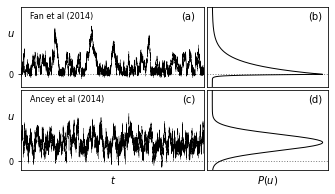

In [5]:
# set up font sizes
xsmol = 4
smol = 6 # the font sizes
med = 8
lar = 10
plt.rc('font',size=med)
plt.rc('axes',titlesize=med)
plt.rc('axes',labelsize=med)
plt.rc('xtick',labelsize=xsmol)
plt.rc('ytick',labelsize=xsmol)
plt.rc('legend',fontsize=med)
plt.rc('figure',titlesize=med)

# Initialize a plot grid with 2 rows and 2 columns
# 5 units wide. 3 devoted to trajectories, 2 to distributions
from matplotlib.gridspec import  GridSpec
grid = GridSpec(2,5,wspace=0.04,hspace=0.04)
f = plt.figure(figsize=(5.5,3))#,tight_layout=True)
ax1 = f.add_subplot(grid[0,:3])
ax2 = f.add_subplot(grid[0,3:])
ax3 = f.add_subplot(grid[1,:3])
ax4 = f.add_subplot(grid[1,3:])
axes = [ax1,ax2,ax3,ax4] # for use later


# turn off axis ticks on some plots
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])
ax4.set_xticks([])
ax2.set_yticks([])
ax4.set_yticks([])
# leave y ticks on left column...
# set up y ticks and labels on left column.
#fy = 0.75
#ytick_f = fy*(yM_f-ym_f)+ym_f # location for fan label
#ax1.set_yticks([0,ytick_f]) # make the label
#ax1.set_yticklabels([r"$0$",r"$u$"],fontsize=lar,rotation=0)
ax1.set_yticks([0])
ax1.set_yticklabels([r"$0$"],fontsize=med,rotation=0,va='center')

#ytick_a = fy*(yM_a-ym_a)+ym_a # location for ancey label
#ax3.set_yticks([0,ytick_a]) # make the label
#ax3.set_yticklabels([r"$0$",r"$u$"],fontsize=lar,rotation=0)

ax3.set_yticks([0]) # make the label
ax3.set_yticklabels([r"$0$"],fontsize=med,rotation=0,va='center')

#ax3.set_yticks([,])
#ax3.set_yticklabels([r"$0$",r"$u$"])

# label the panels
labels = ['(a)','(b)','(c)','(d)']
for ax,l in zip(axes,labels):
    ax.annotate(l, xy=(0.95, 0.95), xycoords='axes fraction', fontsize=lar,
                horizontalalignment='right', verticalalignment='top')
# label the axes
ax4.set_xlabel(r'$P(u)$',fontsize=lar)
ax3.set_xlabel(r'$t$',fontsize=lar)
ax1.set_ylabel(r"$u$",fontsize=lar,rotation=0)
ax3.set_ylabel(r"$u$",fontsize=lar,rotation=0)

# set up axis limits... min and Max
ym_f = -1 # for fan
yM_f = 5.5
ym_a = -0.05 # for ancey
yM_a = 0.4


# plot fan trajectories in top left panel. first set up parameters
tmin = 10 # this is the burn in time
tmax = 300 # max sim time
dt = 1e-3 # timestep
t = np.arange(0,tmax,dt) # plotting
mask = t>=tmin # ignore this part of the sims.. burn in
tm = t[mask]
uf = fan(dt,tmax,seed=3) # conduct sims
ua = ancey(dt,tmax,seed=1) 
ua = ua[mask] # clip 
uf = uf[mask]
ax1.plot(tm,uf,lw=0.25,color='black') # plot the trajs
ax3.plot(tm,ua,lw=0.25, color='black')

# now plot the empirical distributions in the right panel
u = np.linspace(-1,5.5,2500)

def pfan(u):
    ug = uf[uf>=0]
    mg = uf[uf>=0].mean() # mean for greater than 0 half of exponential
    ml = uf[uf<=0].mean() # mean for lesser than 0 half of exponential
    o = np.empty_like(u)
    o[u>=0]=np.exp(-u[u>=0]/mg)
    o[u<=0]=np.exp(-u[u<=0]/ml)
    return o

ax2.plot(pfan(u),u,color='black',lw=1)

def panc(u):
    return np.exp(-(u-ua.mean())**2/ua.var()/2) 

ax4.plot(panc(u),u,color='black',lw=1)
# set up axis limits.. 
ax1.set_ylim(ym_f,yM_f) # first for top row
ax2.set_ylim(ym_f,yM_f)


ax3.set_ylim(ym_a,yM_a) # then for bottom two
ax4.set_ylim(ym_a,yM_a)

ax1.set_xlim(tmin,tmax)
ax3.set_xlim(tmin,tmax)

# add in lines indicating the 0 position.
for ax in axes:
    ax.axhline(0,lw=1,color='grey',zorder=-1,linestyle=':')
    
# finally add some text indicating that the top panel is Fan and the lower is Ancey
fy = 0.85
yf = fy*(yM_f-ym_f)+ym_f # location for fan label
ya = fy*(yM_a-ym_a)+ym_a # location for ancey label
x = 0.05*(tm.max()-tm.min())+tm.min()

ax1.text(x,yf,'Fan et al (2014)',fontsize=med)
ax3.text(x,ya,'Ancey et al (2014)',fontsize=med)

# adjust y labels... 
ax1.yaxis.set_label_coords(-0.055,0.6)
ax3.yaxis.set_label_coords(-0.055,0.6)

    
plt.savefig('fanAncey.pdf',dpi=1000)